In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

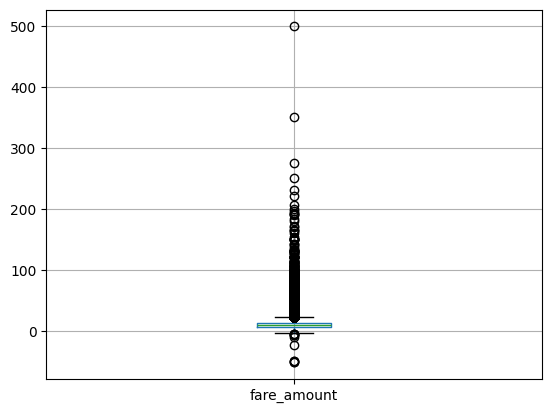

In [5]:
df.boxplot("fare_amount")
plt.show()

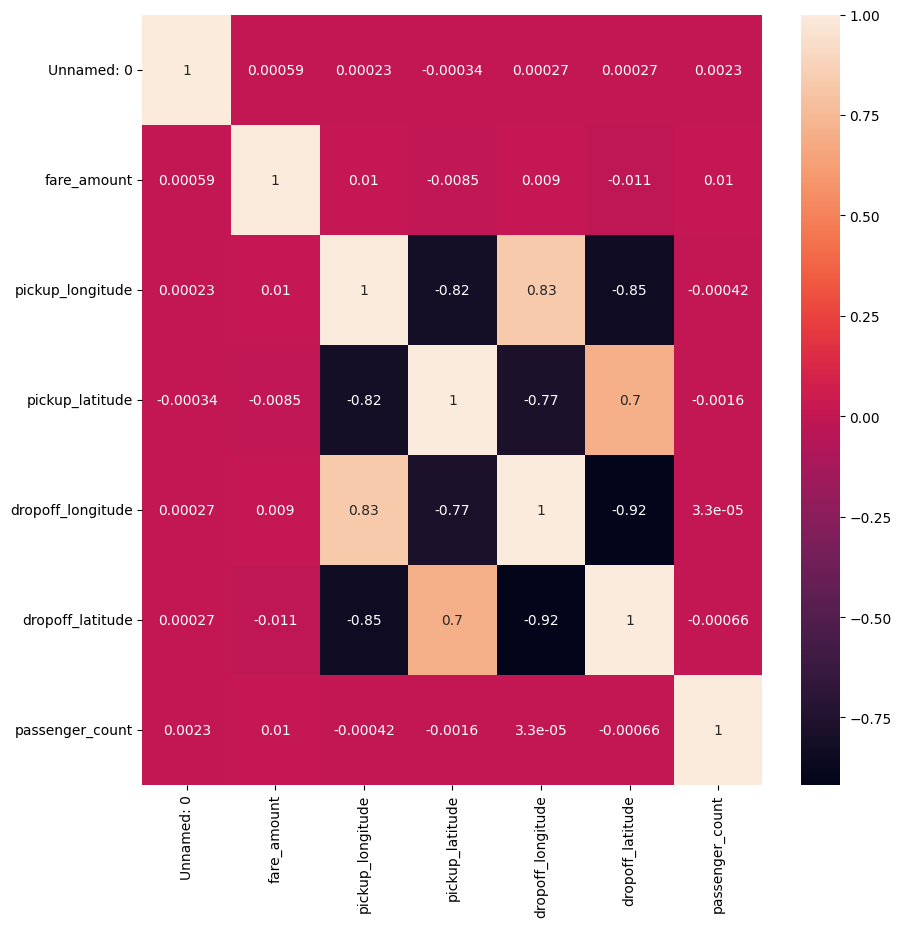

In [6]:
correlation=df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [7]:
x=df.iloc[:,4:8]
y=df.iloc[:,2]
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.999817,40.738354,-73.999512,40.723217
1,-73.994355,40.728225,-73.994710,40.750325
2,-74.005043,40.740770,-73.962565,40.772647
3,-73.976124,40.790844,-73.965316,40.803349
4,-73.925023,40.744085,-73.973082,40.761247
...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297
199996,-73.984722,40.736837,-74.006672,40.739620
199997,-73.986017,40.756487,-73.858957,40.692588
199998,-73.997124,40.725452,-73.983215,40.695415


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)
pred_lr

array([11.32963238, 11.33027089, 11.33076014, ..., 11.33041965,
       11.32903477, 11.33148665])

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=5,random_state=101)
rf.fit(X_train,Y_train)
pred_rf=rf.predict(X_test)
pred_rf

array([9.88, 6.04, 4.86, ..., 7.72, 9.96, 6.64])

In [11]:
from sklearn.metrics import mean_squared_error
rmse_lr=np.sqrt(mean_squared_error(pred_lr,Y_test))
rmse_rf=np.sqrt(mean_squared_error(pred_rf,Y_test))

In [12]:
rmse_lr

10.019858212933078

In [13]:
rmse_rf

5.423674960974866